In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [28]:
#-------------------
def getFPData(fpfile,useallintervals):
  fpdata = pd.read_csv(fpfile,usecols=[0,1,2,3])
  fpdata[fpdata.columns[0:3]] = np.array(fpdata.iloc[:,0:3],dtype=float)
  fpdata[fpdata.columns[3]] = np.array(fpdata.iloc[:,3],dtype=int)
  fpdata[fpdata.columns[0:2]] = fpdata.iloc[:,[1,0]]
  numintervals = fpdata.iloc[:,3].max()
  if useallintervals.lower() == 'y':
    fpdataintervals = []
    for i in range(0,numintervals):
      fpint = fpdata[fpdata[fpdata.columns[3]] == i+1]
      fpint = fpint.drop(fpint.columns[3],axis=1)
      fpdataintervals.append(fpint)
  else:
    fpdataintervals = []
    fpint = fpdata[fpdata[fpdata.columns[3]] == 1]
    fpint = fpint.drop(fpint.columns[3],axis=1)
    fpdataintervals.append(fpint)
  return [fpdata, numintervals, fpdataintervals]
#-------------------
def getSubintervalIndsRange(fpdata,subintervalsize,startsubint,interval):
  numinds = len(fpdata[fpdata[fpdata.columns[3]] == interval+1])
  numsubintervals = numinds//subintervalsize
  subintervalinds = np.arange(startsubint*subintervalsize,startsubint*subintervalsize+subintervalsize)
  return [subintervalinds, numsubintervals]
#-------------------
def getNumSubintervals(fpdata,subintervalsize,interval):
  numinds = len(fpdata[fpdata[fpdata.columns[3]] == interval+1])
  numsubintervals = numinds//subintervalsize
  return numsubintervals
#-------------------
def getBresenhamLineMatrix(curve, resolution):
  line_matrix = np.zeros((resolution,resolution), dtype=bool)
  for i in range(0,len(curve)-1):
    add_line_matrix = np.zeros((resolution,resolution), dtype=bool)
    x1, y1 = curve[i,:]
    x2, y2 = curve[i+1,:]
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    x, y = x1, y1
    if dx > dy:
      err = dx / 2.0
      while x != x2:
        add_line_matrix[x,y] = True
        err -= dy
        if err < 0:
          y += sy
          err += dx
        x += sx
    else:
      err = dy / 2.0
      while y != y2:
        add_line_matrix[x,y] = True
        err -= dx
        if err < 0:
          x += sx
          err += dy
        y += sy
            
    add_line_matrix[x,y] = True
    line_matrix = np.logical_or(line_matrix, add_line_matrix)
  return line_matrix
#-------------------
def makeLinesRear(fpdata,useinds,alllims,rangerear):
  pngloc = fpdata.iloc[useinds,:].copy()
  pngloc.iloc[:,0:2] = -pngloc.iloc[:,0:2]
  pngloc.iloc[:,1] = pngloc.iloc[:,1]-alllims[1,0]
  pngloc.iloc[:,1] = round((resolution-1)*((pngloc.iloc[:,1]/rangerear)))
  pngloc.iloc[:,0] = pngloc.iloc[:,0]-alllims[0,0]
  pngloc.iloc[:,0] = round((resolution-1)*((pngloc.iloc[:,0]/rangerear)))
  pngloc = pngloc.astype(int)

  pngim = getBresenhamLineMatrix(pngloc.values[:,[1,0]],resolution)
  pngim = pngim.astype(np.uint8)*255
  return pngim
#-------------------
def makeLinesRearPriya(fpdata,useinds,alllims,rangerear):
  pngloc = fpdata.iloc[useinds,:].copy()
  pngloc.iloc[:,0:2] = -pngloc.iloc[:,0:2]
  pngloc.iloc[:,1] = pngloc.iloc[:,1]-alllims[1,0]
  pngloc.iloc[:,1] = (resolution-1)*((pngloc.iloc[:,1]/rangerear))
  pngloc.iloc[:,0] = pngloc.iloc[:,0]-alllims[0,0]
  pngloc.iloc[:,0] = (resolution-1)*((pngloc.iloc[:,0]/rangerear))
  pngloc = pngloc.astype(int)

  pngim = getBresenhamLineMatrix(pngloc.values[:,[1,0]],resolution)
  pngim = pngim.astype(np.uint8)*255
  return pngim
#-------------------

In [29]:
subintervalsize = int(500)
resolution = int(128)
startint = 0

alllims = np.array([[-16,16],[-16,16],[-16,16]])
allrangetop = 32
allrangeside = 32
allrangerear = 32

fileloc = 'C:\\Users\\conor\\Downloads\\BresenhamLineTest\\'
# rawfile = fileloc + 'Cooper_08-0mph_run1867_rawdata.csv'
rawfile = fileloc + 'Cooper_05-0mph_run1868_rawdata.csv'

In [30]:
rawdata, numintervals, rawdataintervals = getFPData(rawfile,'N')
numsubintervals = getNumSubintervals(rawdata,subintervalsize,0)
useinds, endint = getSubintervalIndsRange(rawdata,subintervalsize,startint,0)
linesrear = makeLinesRear(rawdataintervals[0],useinds,alllims,allrangerear)
rearim = Image.fromarray(linesrear)
rearim.save(rawfile[:-11] + 'rear.png')

In [31]:
rawdata, numintervals, rawdataintervals = getFPData(rawfile,'N')
numsubintervals = getNumSubintervals(rawdata,subintervalsize,0)
useinds, endint = getSubintervalIndsRange(rawdata,subintervalsize,startint,0)
linesrear = makeLinesRearPriya(rawdataintervals[0],useinds,alllims,allrangerear)
rearim = Image.fromarray(linesrear)
rearim.save(rawfile[:-11] + 'rear_Priya.png')

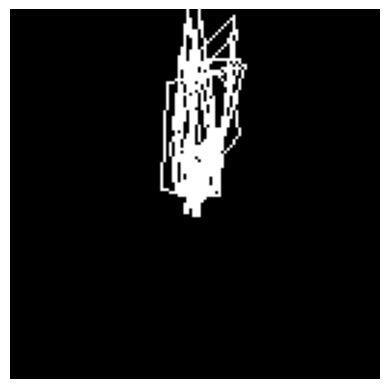

In [68]:
image = Image.open('C:\\Users\\conor\\Downloads\\download (3).jpg')
image_array1 = np.array(image)
if image_array1.shape[2] == 4:
    image_array1 = image_array1[:, :, :3]

plt.imshow(image_array1[:,:,:3])
plt.axis('off')
plt.show()

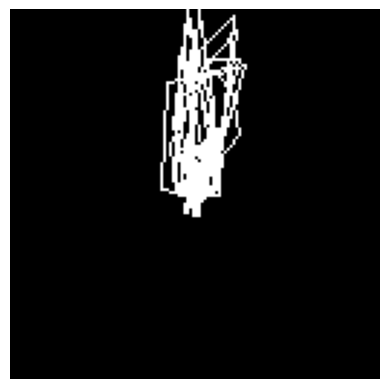

In [67]:
# image = Image.open('C:\\Users\\conor\\Documents\\RunStud\\Testing\\RunVSWalkFPs\\PNGs_rear\\lines\\walk\\P002_walk1872_03-0mph_int0_Subint0_rear.png')
image = Image.open('C:\\Users\\conor\\Documents\\RunStud\\Testing\\RunVSWalkFPs\\PNGs_rear\\lines\\run\\P002_run1876_05-9mph_int0_Subint0_rear.png')
image_array2 = np.array(image)
# if image_array2.shape[2] == 4:
#     image_array2 = image_array2[:, :, :3]

plt.imshow(image_array2[:,:],cmap='gray')
plt.axis('off')
plt.show()

False


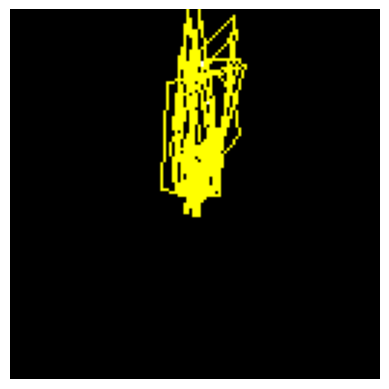

In [69]:
print(np.array_equal(image_array1[:,:,0],image_array2))
imdiff = image_array1.copy()
imdiff[:,:,2] = imdiff[:,:,2]-image_array2
plt.imshow(imdiff)
plt.axis('off')
plt.show()